In [1]:
import matplotlib.pyplot as plt
import numpy as np

import ssbc

In [2]:
p_class1 = 0.10
beta_params_class0 = (2, 5)
beta_params_class1 = (8, 2)

alpha_0 = 0.10
delta_0 = 0.10
alpha_1 = 0.10
delta_1 = 0.10

In [3]:
sampler = ssbc.simulation.BinaryClassifierSimulator(
    p_class1=p_class1, beta_params_class0=beta_params_class0, beta_params_class1=beta_params_class1
)

In [8]:
labels, probs = sampler.generate(10000)
class_data = ssbc.split_by_class(labels=labels, probs=probs)

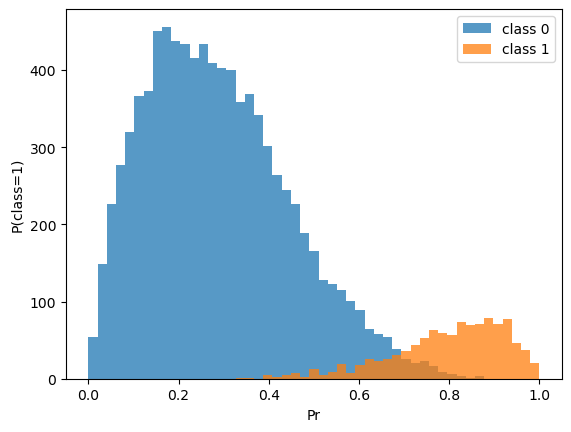

In [9]:
plt.hist(class_data[0]["probs"][:, 1], bins=np.linspace(0, 1, 50), alpha=0.75)
plt.hist(class_data[1]["probs"][:, 1], bins=np.linspace(0, 1, 50), alpha=0.75)
plt.legend(["class 0", "class 1"])
plt.ylabel("P(class=1)")
plt.xlabel("Pr")
plt.show()

In [10]:
cal_result, pred_stats = ssbc.mondrian_conformal_calibrate(
    alpha_target={0: alpha_0, 1: alpha_1}, delta={0: delta_0, 1: delta_1}, class_data=class_data
)

op_bounds = ssbc.compute_mondrian_operational_bounds(
    calibration_result=cal_result, labels=labels, probs=probs, delta=0.10, n_jobs=-1
)

marginal_bounds = ssbc.compute_marginal_operational_bounds(
    labels=labels, probs=probs, alpha_target=0.10, delta_coverage=0.05, delta=0.05, n_jobs=-1
)


summary = ssbc.report_prediction_stats(pred_stats, cal_result, op_bounds, marginal_bounds)

MONDRIAN CONFORMAL PREDICTION REPORT

CLASS 0 (Conditioned on True Label = 0)
  Calibration size: n = 8944
  Target miscoverage: α = 0.100
  SSBC-corrected α:   α' = 0.0959
  PAC risk:           δ = 0.100
  Conformal threshold: 0.5139

  📊 Statistics from Calibration Data (n=8944):
     [Basic CP CIs without PAC guarantee - evaluated on calibration data]
    Abstentions:   522 / 8944 =  5.84%  95% CI: [0.054, 0.063]
    Singletons:   8422 / 8944 = 94.16%  95% CI: [0.937, 0.946]
      Correct:    8087 / 8944 = 90.42%  95% CI: [0.898, 0.910]
      Incorrect:   335 / 8944 =  3.75%  95% CI: [0.034, 0.042]
    Error | singleton:  335 / 8422 =  3.98%  95% CI: [0.036, 0.044]
    Doublets:        0 / 8944 =  0.00%  95% CI: [0.000, 0.000]

  📐 PAC Singleton Error Bound (δ=0.100):
     ρ = 16.134, κ = 1.000
     α'_bound:    0.0442
     α'_observed: 0.0398 ✓

  ✅ RIGOROUS Operational Bounds (LOO-CV)
     PAC confidence: 95.0%
     Calibration size: n = 8944

     ABSTENTION:
       Bounds: [0.05

In [15]:
labels, probs = sampler.generate(100)
class_data = ssbc.split_by_class(labels=labels, probs=probs)

In [16]:
cal_result, pred_stats = ssbc.mondrian_conformal_calibrate(
    alpha_target={0: alpha_0, 1: alpha_1}, delta={0: delta_0, 1: delta_1}, class_data=class_data
)

op_bounds = ssbc.compute_mondrian_operational_bounds(
    calibration_result=cal_result, labels=labels, probs=probs, delta=0.10, n_jobs=-1
)

marginal_bounds = ssbc.compute_marginal_operational_bounds(
    labels=labels, probs=probs, alpha_target=0.10, delta_coverage=0.05, delta=0.05, n_jobs=-1
)


summary = ssbc.report_prediction_stats(pred_stats, cal_result, op_bounds, marginal_bounds)

MONDRIAN CONFORMAL PREDICTION REPORT

CLASS 0 (Conditioned on True Label = 0)
  Calibration size: n = 95
  Target miscoverage: α = 0.100
  SSBC-corrected α:   α' = 0.0625
  PAC risk:           δ = 0.100
  Conformal threshold: 0.5500

  📊 Statistics from Calibration Data (n=95):
     [Basic CP CIs without PAC guarantee - evaluated on calibration data]
    Abstentions:     4 /   95 =  4.21%  95% CI: [0.012, 0.104]
    Singletons:     91 /   95 = 95.79%  95% CI: [0.896, 0.988]
      Correct:      90 /   95 = 94.74%  95% CI: [0.881, 0.983]
      Incorrect:     1 /   95 =  1.05%  95% CI: [0.000, 0.057]
    Error | singleton:    1 /   91 =  1.10%  95% CI: [0.000, 0.060]
    Doublets:        0 /   95 =  0.00%  95% CI: [0.000, 0.038]

  📐 PAC Singleton Error Bound (δ=0.100):
     ρ = 22.750, κ = 1.000
     α'_bound:    0.0604
     α'_observed: 0.0110 ✓

  ✅ RIGOROUS Operational Bounds (LOO-CV)
     PAC confidence: 95.0%
     Calibration size: n = 95

     ABSTENTION:
       Bounds: [0.021, 0.1